<a href="https://colab.research.google.com/github/katiegaertner/SP500-Forecasting/blob/main/S%26P_500_RNN_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, SimpleRNN, BatchNormalization

import seaborn as sns
import tensorflow as tf

#Exploratory Data Analysis

In [108]:
#Bring in Data
url = 'https://raw.githubusercontent.com/katiegaertner/SP500-Forecasting/main/SP5500Historical.csv'
data = pd.read_csv(url)
data.head()

,Date,Close/Last,Volume,Open,High,Low
0,03/02/2022,4386.54,--,4322.56,4401.48,4322.56
1,03/01/2022,4306.26,--,4363.14,4378.45,4279.54
2,02/28/2022,4373.94,--,4354.17,4388.84,4315.12
3,02/25/2022,4384.65,--,4298.38,4385.34,4286.83
4,02/24/2022,4288.70,--,4155.77,4294.73,4114.65


In [154]:
#descriptive statistics
data.describe()

,Close/Last,Open,High,Low
count,1259.000000,1259.000000,1259.000000,1259.000000
mean,3192.298928,3191.924234,3208.506458,3173.734734
std,690.115533,689.771762,693.402610,686.152071
min,2237.400000,2290.710000,2300.730000,2191.860000
25%,2695.475000,2691.405000,2711.000000,2678.390000
50%,2922.940000,2918.560000,2931.680000,2905.440000
75%,3642.920000,3642.210000,3655.950000,3631.365000
max,4796.560000,4804.510000,4818.620000,4780.040000


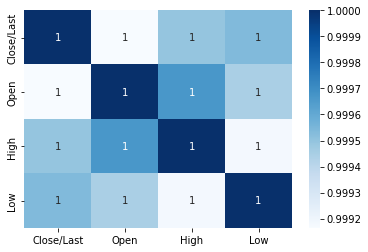

In [163]:
#correlation map
sns.heatmap(data.corr(), cmap='Blues', annot=True);

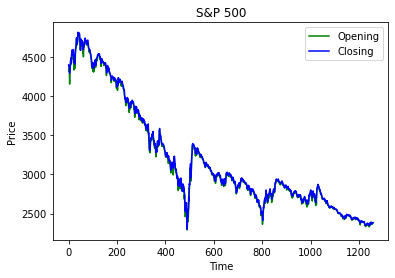

In [168]:
#Opening and Closing Prices over time
plt.plot(data['Open'], color = 'green', label = 'Opening')
plt.plot(data['Close/Last'], color = 'blue', label = 'Closing')
plt.title('S&P 500')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [112]:
#creating dataframe
data = data.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(data)),columns=['Date', 'Close/Last'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close/Last'][i] = data['Close/Last'][i]

In [113]:
#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

In [116]:
#creating train and test sets
dataset = new_data.values
train = dataset[0:round(data.shape[0]*.8),:]
valid = dataset[round(data.shape[0]*.8):round(data.shape[0]*.9),:]
test = dataset[round(data.shape[0]*.9):,:]

In [117]:
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [118]:
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

#Simple RNN

In [151]:
model = Sequential([
              SimpleRNN(20, return_sequences=True,input_shape=(x_train.shape[1],1)),
              SimpleRNN(20, return_sequences=True),
              SimpleRNN(1)
])

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=2)

Epoch 1/10
30/30 - 3s - loss: 0.1290 - accuracy: 0.0011 - 3s/epoch - 93ms/step
Epoch 2/10
30/30 - 1s - loss: 0.0080 - accuracy: 0.0011 - 778ms/epoch - 26ms/step
Epoch 3/10
30/30 - 1s - loss: 0.0057 - accuracy: 0.0011 - 787ms/epoch - 26ms/step
Epoch 4/10
30/30 - 1s - loss: 0.0043 - accuracy: 0.0011 - 790ms/epoch - 26ms/step
Epoch 5/10
30/30 - 1s - loss: 0.0034 - accuracy: 0.0011 - 801ms/epoch - 27ms/step
Epoch 6/10
30/30 - 1s - loss: 0.0028 - accuracy: 0.0011 - 781ms/epoch - 26ms/step
Epoch 7/10
30/30 - 1s - loss: 0.0024 - accuracy: 0.0011 - 793ms/epoch - 26ms/step
Epoch 8/10
30/30 - 1s - loss: 0.0021 - accuracy: 0.0011 - 788ms/epoch - 26ms/step
Epoch 9/10
30/30 - 1s - loss: 0.0020 - accuracy: 0.0011 - 803ms/epoch - 27ms/step
Epoch 10/10
30/30 - 1s - loss: 0.0018 - accuracy: 0.0011 - 786ms/epoch - 26ms/step


In [152]:
#predicting using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

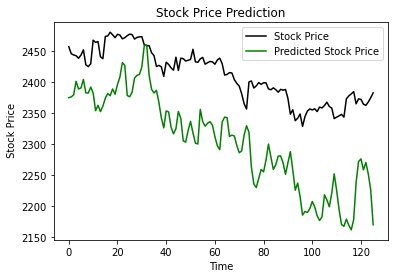

In [153]:
plt.plot(real_closing_price, color = 'black', label = 'Stock Price')
plt.plot(closing_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

# Model 1

In [135]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=2)

Epoch 1/10
30/30 - 6s - loss: 0.0253 - accuracy: 0.0011 - 6s/epoch - 198ms/step
Epoch 2/10
30/30 - 2s - loss: 0.0017 - accuracy: 0.0011 - 2s/epoch - 54ms/step
Epoch 3/10
30/30 - 2s - loss: 0.0010 - accuracy: 0.0011 - 2s/epoch - 53ms/step
Epoch 4/10
30/30 - 2s - loss: 9.7700e-04 - accuracy: 0.0011 - 2s/epoch - 56ms/step
Epoch 5/10
30/30 - 2s - loss: 9.4732e-04 - accuracy: 0.0011 - 2s/epoch - 55ms/step
Epoch 6/10
30/30 - 2s - loss: 9.5498e-04 - accuracy: 0.0011 - 2s/epoch - 54ms/step
Epoch 7/10
30/30 - 2s - loss: 9.2453e-04 - accuracy: 0.0011 - 2s/epoch - 56ms/step
Epoch 8/10
30/30 - 2s - loss: 8.7707e-04 - accuracy: 0.0011 - 2s/epoch - 54ms/step
Epoch 9/10
30/30 - 2s - loss: 8.5548e-04 - accuracy: 0.0011 - 2s/epoch - 55ms/step
Epoch 10/10
30/30 - 2s - loss: 8.3606e-04 - accuracy: 0.0011 - 2s/epoch - 54ms/step


In [122]:
#predicting using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [131]:
real_closing_price = test

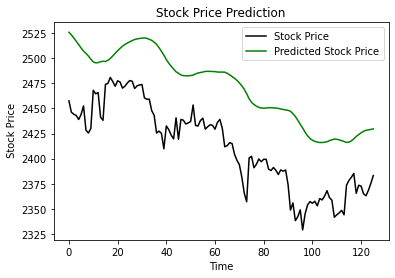

In [132]:
plt.plot(real_closing_price, color = 'black', label = 'Stock Price')
plt.plot(closing_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

#Model 2

In [146]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=2)

Epoch 1/10
30/30 - 13s - loss: 0.0413 - accuracy: 0.0011 - 13s/epoch - 442ms/step
Epoch 2/10
30/30 - 3s - loss: 0.0040 - accuracy: 0.0011 - 3s/epoch - 115ms/step
Epoch 3/10
30/30 - 3s - loss: 0.0028 - accuracy: 0.0011 - 3s/epoch - 116ms/step
Epoch 4/10
30/30 - 3s - loss: 0.0026 - accuracy: 0.0011 - 3s/epoch - 113ms/step
Epoch 5/10
30/30 - 3s - loss: 0.0024 - accuracy: 0.0011 - 3s/epoch - 115ms/step
Epoch 6/10
30/30 - 3s - loss: 0.0024 - accuracy: 0.0011 - 3s/epoch - 115ms/step
Epoch 7/10
30/30 - 3s - loss: 0.0024 - accuracy: 0.0011 - 3s/epoch - 113ms/step
Epoch 8/10
30/30 - 3s - loss: 0.0023 - accuracy: 0.0011 - 3s/epoch - 114ms/step
Epoch 9/10
30/30 - 3s - loss: 0.0023 - accuracy: 0.0011 - 3s/epoch - 113ms/step
Epoch 10/10
30/30 - 4s - loss: 0.0022 - accuracy: 0.0011 - 4s/epoch - 117ms/step


In [147]:
#predicting using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

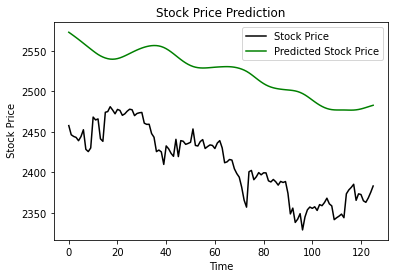

In [148]:
plt.plot(real_closing_price, color = 'black', label = 'Stock Price')
plt.plot(closing_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()